<a href="https://colab.research.google.com/github/Zendellll/Road2_AI_Course/blob/main/AICourse_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

We are going to be working on the Fashion MNIST database from TensorFlow Databases.

1) Load the dataset

2) Showcase a small amount of sample images

3) display statistical information about the data (for example - distribution of clothing items, amount of training/test data, amount of items from each class, etc...). Might display it in a graph or a pie chart.

4) Answer weather the DS is balanced or not (for both train and test).

4.5) Normalize the DS and show a batch of normalized images. Show 25 random images (you can use take(25)).

5) Build a network which gets a 28*28 image of a clothing item and outputs a classification for the item (which kind of clothing is it). Also, convert the output to the class name. Our optimizer is Adam, loss function is Cross-Entropy, and metric is accuracy.

The network will have output layer of 10 neurons (one for each class), with each neuron holding the probability of the corresponding class appearing in the image.

We will make our prediction to be the neuron with the highest probability.

6) We will need to flatten the image matrix into a vector before inputting it into our network.

7) On the last layer (output layer), our activation function will be SoftMax.

##Notes:

- MSE has no meaning when we have multiple classes. Therefore we will use a loss function which is called Cross-Entropy.

- From TF-Dataset, we get the function load function. Using this fucntion, we will get supervised fashion-Mnist (as_supervised=True), which is already split into train and test (with_info = true).

- Build a map to convert class num (0-9) to class name.

- Rule of thumb - If you want your network to produce good results, make sure all inputs are between 0,1. Meaning we would want to normalize values to fall in this section (0,1). This means we would normalize the entire image before inputting it into the network.

- For normalizing the entire image, we would define a normalization function, and use the map function to map the entire DS according to the normalization function.

- Experiment with different network architectures to try and achieve maximal results.

# Prompt 1:
Today your'e going to be my assistant. I'm working on a Mac, using Google Colab. We will be training AI models with Keras and the Fashion-MNIST dataset from TensorFlow Databases.

First off, I need you to write some code to load the Fashion MNIST dataset from TensorFlow Databases into google colab
# Prompt 2:
I would like to use the load function, with as_supervised=True and with_info=true

In [1]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the Fashion MNIST dataset with info
dataset, info = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

# Split the dataset into training and testing sets
train_dataset, test_dataset = dataset['train'], dataset['test']

# Display dataset information
print(info)

# Function to normalize images
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Apply normalization to the datasets
train_dataset = train_dataset.map(normalize_img)
test_dataset = test_dataset.map(normalize_img)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHY702D/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHY702D/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmpk0w9zlrrtfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitIn

# Prompt
That's great. Now I need you to display a small sample of the images, lets say 25 random images displayed in a 5*5 square

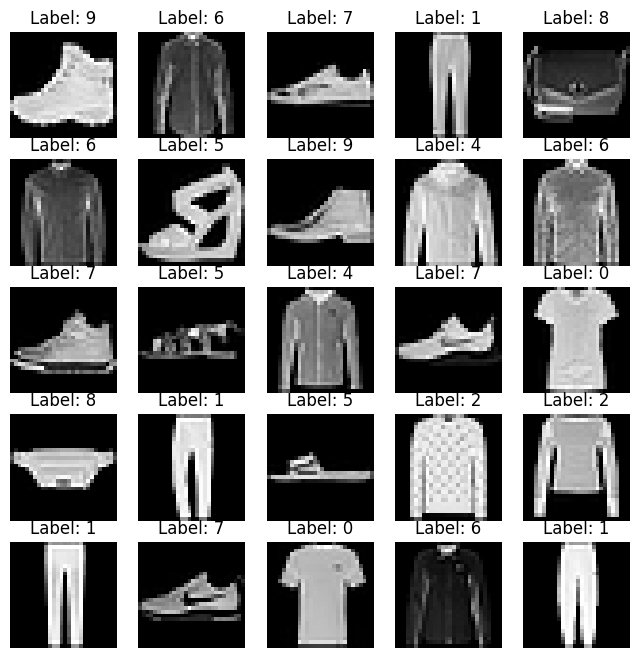

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display a grid of images
def display_images(dataset, num_images=25, grid_size=(5, 5)):
    # Take a random sample of images
    sample_images = dataset.shuffle(buffer_size=1000).take(num_images)

    # Create a grid for displaying the images
    plt.figure(figsize=(8, 8))
    for i, (image, label) in enumerate(sample_images):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(image.numpy(), cmap='gray')
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')

    plt.show()

# Display 25 random images in a 5x5 grid
display_images(train_dataset)

# Prompt
Perfect. Now let's pull some statistical information about our data.
I would like to know distribution of clothing items, histogram of clothing items corresponding to their classes, amount of training and test data.
Please display the distribution as a pie chart, and histogram as a bar graph. Amount of training vs test data should also be displayed in a pie chart.

You could break these tasks into 3 separate codes, or a single one, that's up to you

## Display Distribution as a Pie Chart

In [12]:
def get_counts(dataset):
  # Calculate counts using a loop
    counts = [0] * 10
    for _, label in dataset:
        counts[label.numpy()] += 1
    return counts


labels = [str(i) for i in range(10)]  # 10 classes in Fashion MNIST

train_counts = get_counts(train_dataset)
test_counts = get_counts(test_dataset)

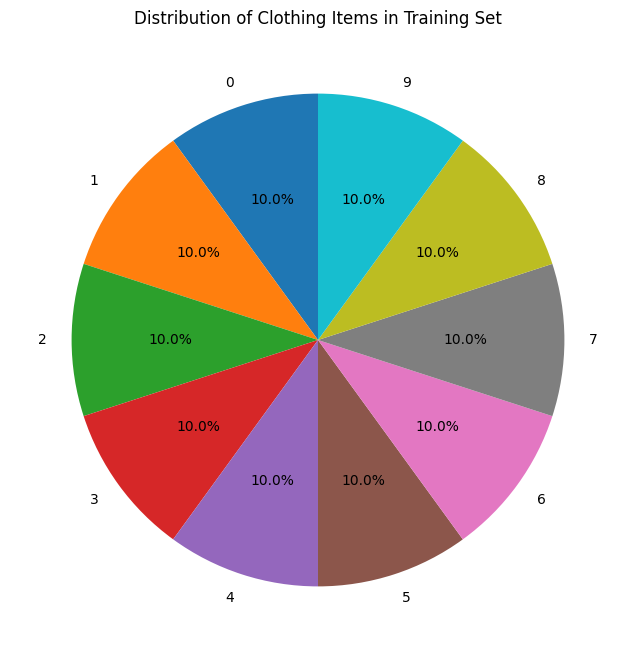

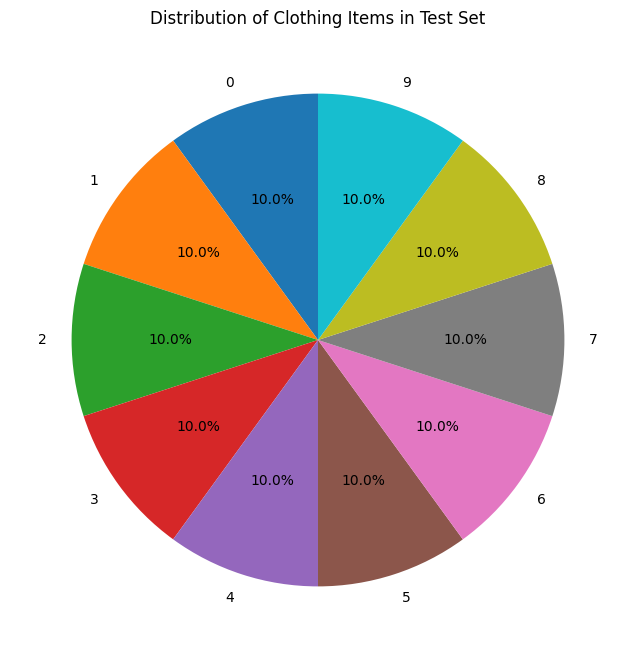

In [13]:
# Function to display distribution of clothing items as a pie chart
def display_distribution_pie_chart(counts, labels, title):
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

# Display distribution of clothing items in training set
display_distribution_pie_chart(train_counts, labels, "Distribution of Clothing Items in Training Set")

# Display distribution of clothing items in test set
display_distribution_pie_chart(test_counts, labels, "Distribution of Clothing Items in Test Set")

## Display Histogram of Clothing Items

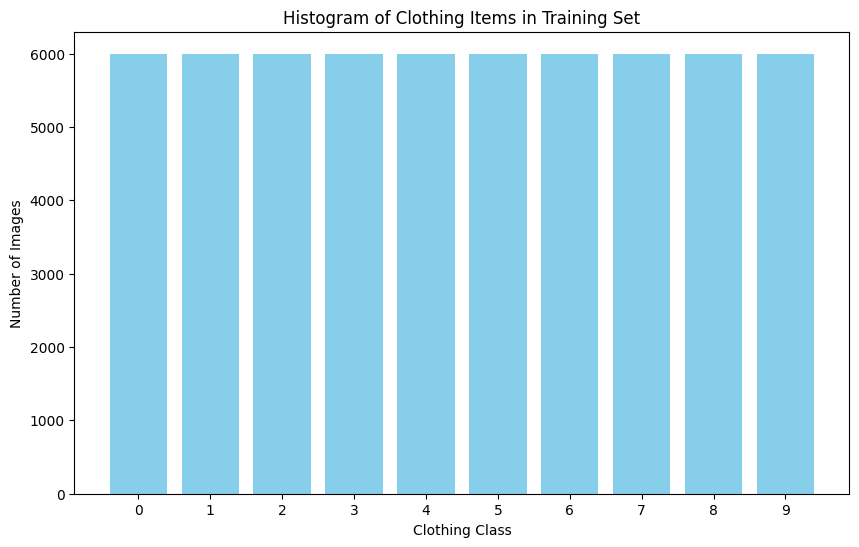

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display histogram of clothing items
def display_histogram(counts, labels, title):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Clothing Class')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.show()

# Display histogram of clothing items in training set
display_histogram(train_counts, labels, "Histogram of Clothing Items in Training Set")


## Display Amount of Training vs Test Data as a Pie Chart

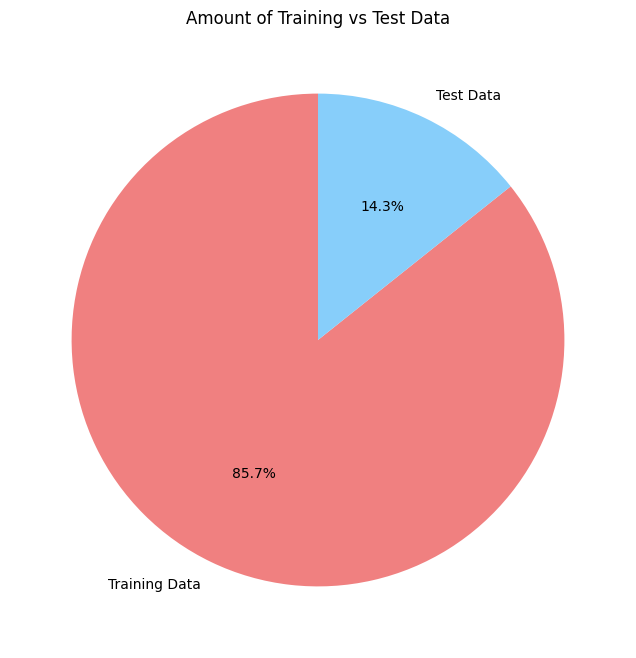

In [6]:
# Function to display amount of training vs test data as a pie chart
def display_data_split_pie_chart(train_size, test_size):
    labels = ['Training Data', 'Test Data']
    sizes = [train_size, test_size]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
    plt.title('Amount of Training vs Test Data')
    plt.show()

# Display amount of training vs test data
train_size = tf.data.experimental.cardinality(train_dataset).numpy()
test_size = tf.data.experimental.cardinality(test_dataset).numpy()
display_data_split_pie_chart(train_size, test_size)

# Prompt
Everything's great so far.
Now, I would need you to write a script to check if both train and test datasets are balanced or not, and provide an output accordingly

In [15]:
# Function to check if a dataset is balanced
def check_balance(counts, dataset_name):
    min_count = min(counts)
    max_count = max(counts)
    balance_threshold = 0.2  # Adjust this threshold based on your criteria

    if (max_count - min_count) / len(counts) <= balance_threshold:
        print(f"{dataset_name} is balanced.")
    else:
        print(f"{dataset_name} is not balanced.")

# Check balance for training set
check_balance(train_counts, "Training Set")

# Check balance for test set
check_balance(test_counts, "Test Set")


Training Set is balanced.
Test Set is balanced.


# Prompt
Perfect. Now we will build our network.
Our network gets a 28*28 greyscale image from the Fashion MNIST dataset, and outputs a classification for the item.
The image matrix needs to be flattened into a vector before inputting it into our network.
The network will have an output layer of 10 neurons (one for each class), with each neuron holding the probability of the corresponding class appearing in the image.
We will make our prediction to be the neuron with the highest probability.
Our optimizer will be Adam, our loss function will be Cross-Entropy, and our metric is accuracy.
On the output layer, our activation function will be SoftMax.

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Flatten the input image matrix into a vector
model.add(layers.Flatten(input_shape=(28, 28)))

# Add a dense layer with 128 neurons and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Add the output layer with 10 neurons, softmax activation for multi-class classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 16

# Train the model on the Fashion MNIST dataset
history = model.fit(train_dataset.batch(batch_size), epochs=epochs, validation_data=test_dataset.batch(batch_size))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset.batch(batch_size))
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
3750/3750 [==============================] - 20s 4ms/step - loss: 0.4843 - accuracy: 0.8273 - val_loss: 0.4012 - val_accuracy: 0.8558
Epoch 2/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3651 - accuracy: 0.8663 - val_loss: 0.3679 - val_accuracy: 0.8685
Epoch 3/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3288 - accuracy: 0.8788 - val_loss: 0.3580 - val_accuracy: 0.8746
Epoch 4/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3044 - accuracy: 0.8883 - val_loss: 0.3505 - val_accuracy: 0.8757
Epoch 5/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.2865 - accuracy: 0.8937 - val_loss: 0.3459 - val_accuracy: 0.8779
Epoch 6/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.2718 - accuracy: 0.8989 - val_loss: 0.3484 - val_accuracy: 0.8807
Epoch 7/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2592 - accuracy: 0.9033 - val_loss: 0.3458 - val_ac

# Prompt
That's great.
Now, I want to take a sample of 25 random images from the test dataset.
For each of the images, I want to run it through the model, get a prediction, choose the predicted class as the node with the highest probability in the output vector.
I have a variable called class_names to help convert from the class number to the class name.
When all predictions are done, I want to output all images in a 5*5 grid, with each images having the correct class and the predicted class above it.

1/1 [==============================] - 0s 26ms/step


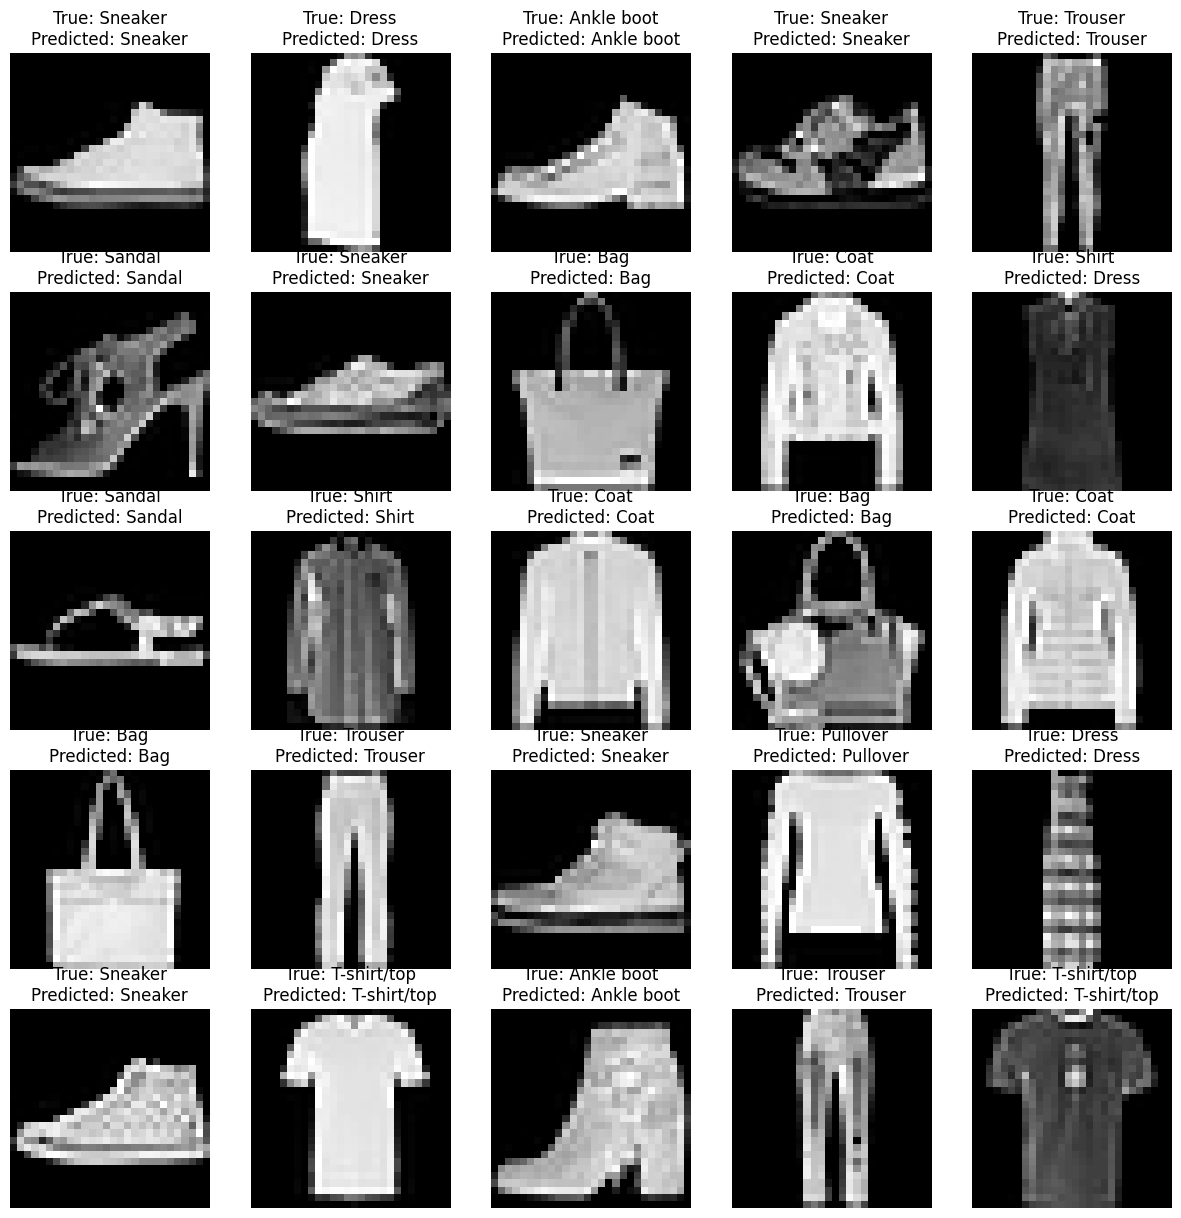

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Take a sample of 25 random images from the test dataset
sample_images = test_dataset.shuffle(buffer_size=1000).take(25)

# Function to display images in a grid with correct and predicted classes
def display_predictions(model, dataset, class_names):
    plt.figure(figsize=(15, 15))

    for i, (image, label) in enumerate(dataset):
        # Run the image through the model to get predictions
        predictions = model.predict(np.expand_dims(image, axis=0))
        predicted_class = np.argmax(predictions)

        # Plot the image
        plt.subplot(5, 5, i + 1)
        plt.imshow(image.numpy(), cmap='gray')
        plt.title(f"True: {class_names[label.numpy()]}\nPredicted: {class_names[predicted_class]}")
        plt.axis('off')

        # Display 25 images
        if i == 24:
            break

    plt.show()

# Display the images with correct and predicted classes
display_predictions(model, sample_images, class_names)
